In [3]:
import zipfile

zipfile1 = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zipfile1.extractall('data')

In [4]:
zip2 = zipfile.ZipFile('/content/data/train.zip').extractall('data/train')
zip3 = zipfile.ZipFile('/content/data/test1.zip').extractall('data/test')

In [1]:
import os
import shutil
os.listdir('data/train/train')

[]

In [6]:
os.mkdir('data/train_cats')
os.mkdir('data/train_dogs')
os.mkdir('data/test_cats')
os.mkdir('data/test_dogs')

In [7]:
# move cats and dogs train images to folders
for img in os.listdir('data/train/train'):
  if 'cat' in img:
    shutil.move('data/train/train/'+img, 'data/train_cats')
  elif 'dog' in img:
    shutil.move('data/train/train/'+img, 'data/train_dogs')

In [4]:
print("cats images lenth:", len(os.listdir('/content/data/train_cats')))
print("dogs images lenth:", len(os.listdir('/content/data/train_dogs')))

cats images lenth: 12500
dogs images lenth: 12500


In [20]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
def display_images_from_folder(folder, num_images=5):
    # Get list of image filenames in the folder
    image_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

    # Create a grid of subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Iterate through the first num_images images and display them
    for ax, filename in zip(axes, image_files[:num_images]):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        ax.imshow(img)
        ax.axis('off')  # Hide axis
        ax.set_title(filename)  # Set filename as title

    plt.show()

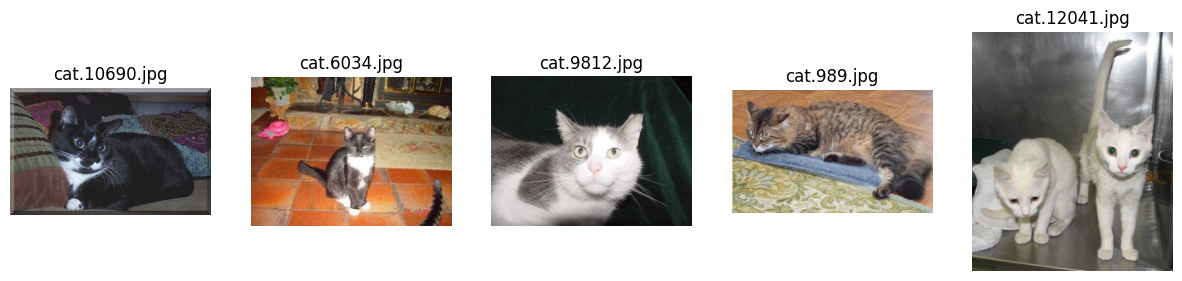

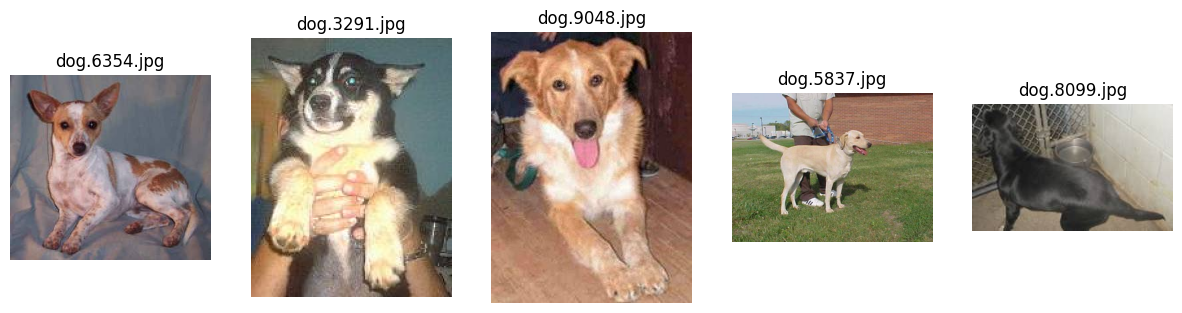

In [31]:
display_images_from_folder('/content/data/train_cats', 5)
display_images_from_folder('/content/data/train_dogs', 5)


In [3]:
def images_to_arrays(file_path, size=(64, 64)):
  images = []
  images_path = os.listdir(file_path)
  i = 0
  for img in images_path:

    try:
      open(os.path.join(file_path, img), 'r')
    except:
      print('Error in this image:', img)
      continue

    image_path = os.path.join(file_path, img)
    image = cv2.imread(image_path)
    image = cv2.resize(image, size)
    i += 1
    print(i)
    images.append(image/255.0)
  return np.array(images)

In [ ]:
cat_images = images_to_arrays('/content/data/train_cats')

In [ ]:
dog_images = images_to_arrays('/content/data/train_dogs')

In [6]:
# splite X and Y making cats -> 1 and dog -> 0

x = np.concatenate((cat_images, dog_images), axis=0)
y = np.concatenate((np.ones((12500,)), np.zeros((12500,))))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

In [8]:
X_train_flattened = x_train.reshape(x_train.shape[0], -1)
X_test_flattened = x_test.reshape(x_test.shape[0], -1)

In [13]:
X_test_flattened[:250].shape

(250, 12288)

# build the model

In [9]:
svm = SVC().fit(X_train_flattened, y_train)

In [14]:
score = svm.score(X_test_flattened[:250], y_test[:250])

In [16]:
print("score:", score)

score: 0.68


In [17]:
y_pred = svm.predict(X_test_flattened[250:400])
y_real = y_test[250:400]

In [19]:
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73        71
         1.0       0.76      0.76      0.76        79

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



<Axes: >

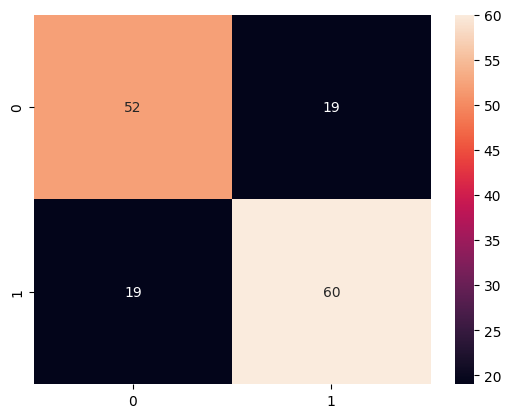

In [23]:
sns.heatmap(confusion_matrix(y_real, y_pred), annot=True)